# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities1 =['velha', 'grand forks', 'nelson bay', 'san cristobal', 'new york', 'london', 'amsterdam', 'boston']
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#city='New York'

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

response = requests.get(query_url + city).json()

#response = requests.get(query_url + city ).json()
#response
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e6dfaad8a336fc15228a46a3b4fcb64b&units=imperial&q='

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
# create a data frame from cities, lat, and temp

newcity = []
id1 =[]
cloudiness =[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxTemp=[]
windSpeed=[]
count=0
total=len(cities)

for city in cities:
    try:
        #print(query_url + city)
        response = requests.get(query_url + city).json()
        newcity.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response["coord"]['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        id1.append(response['id'])
        count +=1
        print(f"Processing City ID:{id1}, Name {newcity}, {count} of {total}")
        
    except:
        print('city not found. {newcity}')

print(f"Data Retrieval Complete")

        

weather_dict = {
    "city": newcity,
    'cloud':cloudiness,
    'country':country,
    'date':date,
    'humid':humidity,
    "lat":lat,
    'lng':lng,
    'Max_Temp_F':maxTemp,
    'Wind_Speed':windSpeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(12)

Processing City ID:[1865309], Name ['Katsuura'], 1 of 603
Processing City ID:[1865309, 6185377], Name ['Katsuura', 'Yellowknife'], 2 of 603
Processing City ID:[1865309, 6185377, 525426], Name ['Katsuura', 'Yellowknife', 'Sobolevo'], 3 of 603
Processing City ID:[1865309, 6185377, 525426, 2112802], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki'], 4 of 603
city not found. {newcity}
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez'], 5 of 603
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas'], 6 of 603
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson'], 7 of 603
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208], Name ['Katsuura', 'Yellowknife', 'Sobol

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao Filipe', 'Huarmey', 'Albany', 'Barrow', 'Atuona'], 28 of 603
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengi

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao Filipe', 'Huarmey', 'Albany', 'Barrow', 'Atuona', 'Souillac', 'Emba', 'Touros', 'Shubarshi', 'Begowal', 'Iqaluit', 'Leningradskiy', 'Lavrentiya', 'Labuhan', 'Chas', 'Paoua', 'Cape Town', 'Port Alfred', 'New Norfolk'], 42 of 603
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103,

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao Filipe', 'Huarmey', 'Albany', 'Barrow', 'Atuona', 'Souillac', 'Emba', 'Touros', 'Shubarshi', 'Begowal', 'Iqaluit', 'Leningradskiy', 'Lavrentiya', 'Labuhan', 'Chas', 'Paoua', 'Cape Town', 'Port Alfred', 'New Norfolk', 'Kampot', 'Saint-Paul

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao Filipe', 'Huarmey', 'Albany', 'Barrow', 'Atuona', 'Souillac', 'Emba', 'Touros', 'Shubarshi', 'Begowal', 'Iqaluit', 'Leningradskiy', 'Lavrentiya', 'Labuhan', 'Chas', 'Pa

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao Filipe', 'Huarmey', 'Albany', 'Barrow', 'Atuona', 'Souillac', 'Emba', 'Touros', 'Shubarshi', 'Begowal', 'I

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao Filipe', 'Huarmey', 'Albany', 'Barrow', 'Atuona', 'So

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 'Kahului', 'Egvekinot', 'Imeni Poliny Osipenko', 'Sao

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 'Port Hardy', 'Rikitea', 'Chara', 'Ushuaia', 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Busselton', 'Avarua', 'Vaini', 'Hilo', 'Salalah', 'Lasa', 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaanaaq', 'Kibre Mengist', 'Bluff', 'Buss

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez', 'Punta Arenas', 'Dikson', 'Qaana

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739], Name ['Katsuura', 'Yellowknife', 'Sobolevo', 'Hasaki', 'Fez

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936], Name ['Katsuura', 'Yellow

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

city not found. {newcity}
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

city not found. {newcity}
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

city not found. {newcity}
Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

Processing City ID:[1865309, 6185377, 525426, 2112802, 2548885, 3874787, 1507390, 3831208, 333103, 2175403, 2075265, 4035715, 1273574, 5855927, 286621, 146639, 6111862, 4030556, 262462, 3833367, 5847411, 4031742, 2023584, 3374210, 3939168, 5106834, 3833859, 4020109, 3026644, 146639, 3386213, 608270, 1267016, 5983720, 2123814, 4031637, 1641899, 1274553, 2383523, 3369157, 964432, 2155415, 1831112, 3023532, 3366880, 107304, 3863379, 2017155, 2160063, 3359638, 3424607, 470905, 5017822, 373141, 2068110, 934322, 6201424, 5880568, 3919353, 6138908, 3838233, 3423146, 2069194, 2163355, 1264976, 3355672, 546105, 3652764, 2995603, 4034551, 3939761, 583041, 1861280, 5354943, 1490256, 2980080, 1106677, 2015306, 4787534, 563306, 3374235, 5861897, 6170031, 1712961, 3622854, 2067070, 3573739, 5952330, 4380848, 2122090, 3418910, 5848280, 1521153, 1790885, 2514651, 1737486, 3731095, 3190172, 2172880, 5955902, 2729907, 513898, 2966778, 3115739, 2110227, 2121385, 344979, 659936, 3374083, 3838859, 707744, 

,city,cloud,country,date,humid,lat,lng,Max_Temp_F,Wind_Speed
0,Katsuura,75,JP,1559443820,82,33.93,134.50,69.01,8.05
1,Yellowknife,90,CA,1559443820,71,62.45,-114.38,50.00,9.17
2,Sobolevo,45,RU,1559443820,90,54.43,31.90,57.50,5.91
3,Hasaki,75,JP,1559443820,64,35.73,140.83,81.00,6.93
4,Fez,0,MA,1559443820,42,34.03,-5.02,68.00,8.05
5,Punta Arenas,90,CL,1559443820,86,-53.16,-70.91,41.00,26.40
6,Dikson,100,RU,1559443820,94,73.51,80.55,31.94,8.72
7,Qaanaaq,100,GL,1559443820,93,77.48,-69.36,25.82,7.31
8,Kibre Mengist,100,ET,1559443821,98,5.87,38.99,55.16,1.10
9,Bluff,64,AU,1559443821,64,-23.58,149.07,67.22,5.79


In [82]:
# Store filepath in a variable
#weather_data.to_csv("output_data_file, index=False, header=True)

weather_data.to_csv("output_data/weather_data.csv", index=False, header=True)

weather_data.head(10)

,city,cloud,country,date,humid,lat,lng,Max_Temp_F,Wind_Speed
0,Katsuura,75,JP,1559443820,82,33.93,134.50,69.01,8.05
1,Yellowknife,90,CA,1559443820,71,62.45,-114.38,50.00,9.17
2,Sobolevo,45,RU,1559443820,90,54.43,31.90,57.50,5.91
3,Hasaki,75,JP,1559443820,64,35.73,140.83,81.00,6.93
4,Fez,0,MA,1559443820,42,34.03,-5.02,68.00,8.05
5,Punta Arenas,90,CL,1559443820,86,-53.16,-70.91,41.00,26.40
6,Dikson,100,RU,1559443820,94,73.51,80.55,31.94,8.72
7,Qaanaaq,100,GL,1559443820,93,77.48,-69.36,25.82,7.31
8,Kibre Mengist,100,ET,1559443821,98,5.87,38.99,55.16,1.10
9,Bluff,64,AU,1559443821,64,-23.58,149.07,67.22,5.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

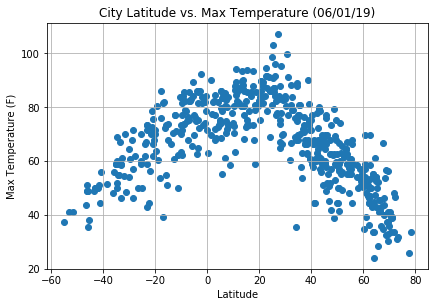

In [90]:
lat_df=weather_data.groupby(['city'])
lat_df.head()
plt.scatter(lat,maxTemp)
plt.tight_layout()
plt.grid()
plt.title('City Latitude vs. Max Temperature (06/01/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/City Latitude vs. Max Temperature.png")


#### Latitude vs. Humidity Plot

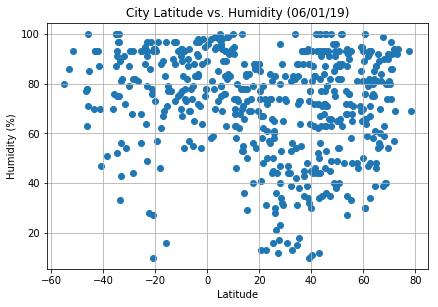

In [91]:
plt.scatter(lat,humidity)
plt.tight_layout()
plt.grid()
plt.title('City Latitude vs. Humidity (06/01/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/City Latitude vs. Humidity.png")


#### Latitude vs. Cloudiness Plot

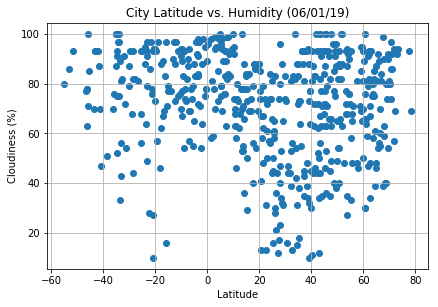

In [92]:
plt.scatter(lat,humidity)
plt.tight_layout()
plt.grid()
plt.title('City Latitude vs. Humidity (06/01/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/City Latitude vs. Cloudiness.png")


#### Latitude vs. Wind Speed Plot

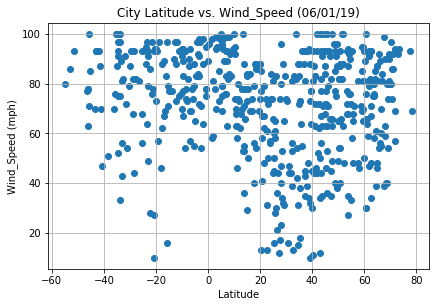

In [93]:
plt.scatter(lat,humidity)
plt.tight_layout()
plt.grid()
plt.title('City Latitude vs. Wind_Speed (06/01/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.savefig("Images/City Latitude vs. Wind_Speed.png")
